In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

digits=load_digits()
y=digits.target==9

X_train, X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)

In [17]:
from sklearn.dummy import DummyClassifier
dummy_majority=DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pre_most_freq=dummy_majority.predict(X_test)

print('unique pred labes: {}'.format(np.unique(pre_most_freq)))
print('score: {}'.format(dummy_majority.score(X_test,y_test)))

unique pred labes: [False]
score: 0.8955555555555555


In [18]:
#90% scoere without learning anything? It predicts False every time

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)

pred_tree=tree.predict(X_test)
print('unique results: {}'.format(np.unique(pred_tree)))
print('score: {}'.format(tree.score(X_test,y_test)))

unique results: [False  True]
score: 0.9177777777777778


In [21]:
#d-tree recognized that some are true and bumped our score 2%

In [30]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1).fit(X_train,y_train)
pred_lr=lr.predict(X_test)
print('lr score: {}'.format(lr.score(X_test,y_test)))

dumm=DummyClassifier().fit(X_train,y_train)
pred_dumm=dumm.predict(X_test)
print('dummy var score: {}'.format(dumm.score(X_test,y_test)))

lr score: 0.9777777777777777
dummy var score: 0.8222222222222222


[[401   2]
 [  8  39]]


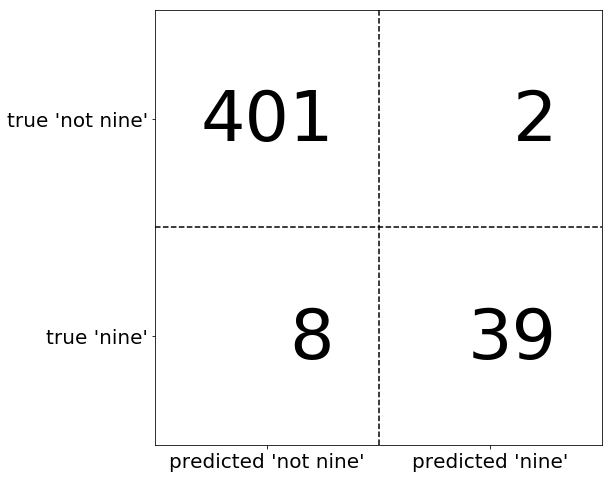

In [34]:
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,pred_lr)
print(confusion)

mglearn.plots.plot_confusion_matrix_illustration()
plt.show()

In [38]:
print('log reg: \n {}'.format(confusion_matrix(y_test,pred_lr)))
print('tree: \n {}'.format(confusion_matrix(y_test,pred_tree)))
print('dummy model: \n {}'.format(confusion_matrix(y_test,pred_dumm)))
print('most frequent: \n {}'.format(confusion_matrix(y_test,pre_most_freq)))

log reg: 
 [[401   2]
 [  8  39]]
tree: 
 [[390  13]
 [ 24  23]]
dummy model: 
 [[371  32]
 [ 42   5]]
most frequent: 
 [[403   0]
 [ 47   0]]


In [40]:
#common metrics:
#   accuracy is just correct/incorrect
#   precision: how many positives were correct   TP/(TP+FP)  -use when goal is to reduce FP
#   recall: how many of the true positives were predicted  TP/(TP+FN)  -use when goal to avoid FN (catch all positives)

#   fscore: summarizes the above metrics into a single score    F= 2*((prec*recall)/(prec+recall))

In [43]:
from sklearn.metrics import f1_score

print('log reg: {}'.format(f1_score(y_test,pred_lr)))
print('tree: {}'.format(f1_score(y_test,pred_tree)))
print('dummy model: {}'.format(f1_score(y_test,pred_dumm)))
print('most frequent: {}'.format(f1_score(y_test,pre_most_freq)))

log reg: 0.8863636363636364
tree: 0.5542168674698795
dummy model: 0.11904761904761907
most frequent: 0.0


/root/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
from sklearn.metrics import classification_report

print('log reg: \n{}'.format(classification_report(y_test,pred_lr)))
print('\n \n tree: \n {}'.format(classification_report(y_test,pred_tree)))
print('\n \n dummy model: \n {}'.format(classification_report(y_test,pred_dumm)))
print('\n \n most frequent: \n {}'.format(classification_report(y_test,pre_most_freq)))

log reg: 
             precision    recall  f1-score   support

      False       0.98      1.00      0.99       403
       True       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450


 
 tree: 
              precision    recall  f1-score   support

      False       0.94      0.97      0.95       403
       True       0.64      0.49      0.55        47

avg / total       0.91      0.92      0.91       450


 
 dummy model: 
              precision    recall  f1-score   support

      False       0.90      0.92      0.91       403
       True       0.14      0.11      0.12        47

avg / total       0.82      0.84      0.83       450


 
 most frequent: 
              precision    recall  f1-score   support

      False       0.90      1.00      0.94       403
       True       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/root/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


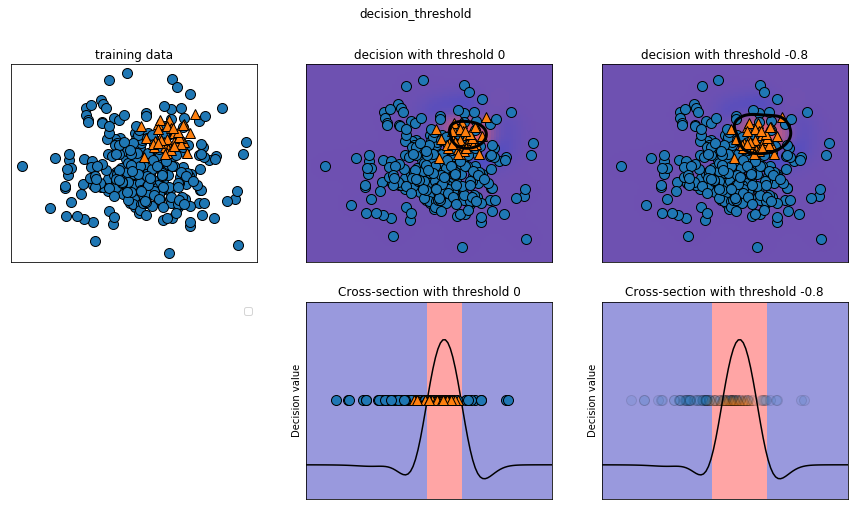

In [50]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC

X,y=make_blobs(n_samples=(400,50),centers=2,cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=0.05).fit(X_train,y_train)

mglearn.plots.plot_decision_threshold()
plt.show()

In [51]:
print(classification_report(y_test,svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [56]:
y_pred_low_thresh=svc.decision_function(X_test) > -.8
print(classification_report(y_test,y_pred_low_thresh))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



In [57]:
#use cross validation with adjusting threshhold